In [2]:
import time,pickle,time,math,sys,pickle,time
import numpy as np
from PIL import Image
from scipy import stats
from matplotlib.pyplot import imshow
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'png'
mpl.rcParams['figure.dpi']= 150

def reader(name):
    images = []
    with open(name, "rb") as f:
        images = pickle.load(f)
    #frames = len(data)
    expimages = []
    for i in images:
        dat = np.reshape(np.pad(np.array(i, dtype=np.uint8),(0,648*488-len(i)), "constant"), (-1,648))
        dat = dat[2:482,2:642]
        expimages.append(dat)
    expimages = np.stack(expimages)  
    return expimages
    # all 100 images are in a 3D array in order of frame -> row -> column

data = []
for exp in range(5,55,5):
    data.append(reader("data_collection_1/frames_{}m.pkl".format(exp)))
data = np.stack(data)
data = np.insert(data, 0, values=reader("data_collection_1/frames_dark.pkl"), axis=0)
print(data.shape)

(11, 100, 480, 640)


In [3]:
# Q1
avgframes = np.mean(data, axis=1, dtype=np.int32, keepdims=True)
avgdevi = np.abs(avgframes-data)
print(avgdevi.shape)
noise = np.column_stack((data.flatten(),avgdevi.flatten()))
del avgdevi,avgframes
def summarize(invals):
    noise_result = np.full(256,0, dtype=np.float64)
    noise_pts = np.full(256,0, dtype=np.float64)
    for point in invals:
        noise_result[point[0]] += point[1]
        noise_pts[point[0]] += 1
    return noise_result/noise_pts

q1_data = summarize(noise[::5])
del noise
print(q1_data.shape)

(11, 100, 480, 640)
(256,)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


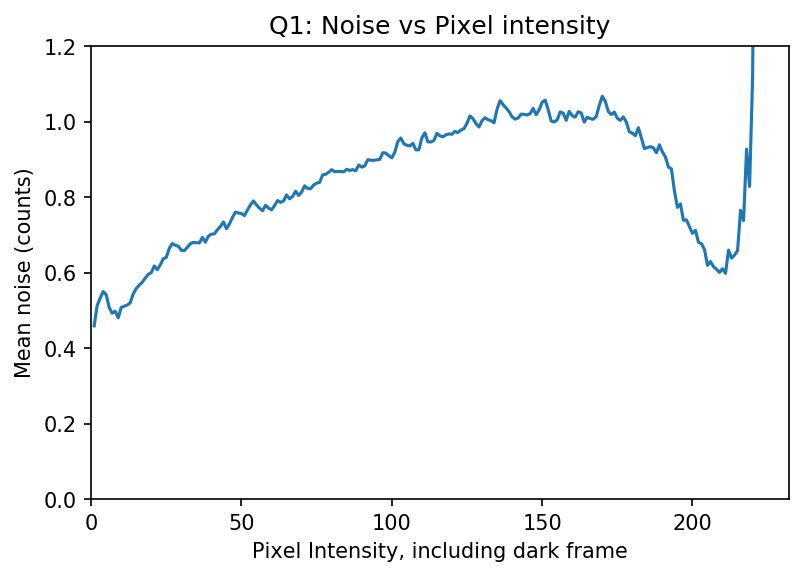

In [4]:
# Q1
plt.plot(range(256)[1:],q1_data[1:])
plt.ylim(0,1.2)
plt.xlim(left=0)
plt.title("Q1: Noise vs Pixel intensity")
plt.xlabel("Pixel Intensity, including dark frame")
plt.ylabel("Mean noise (counts)")
plt.show()

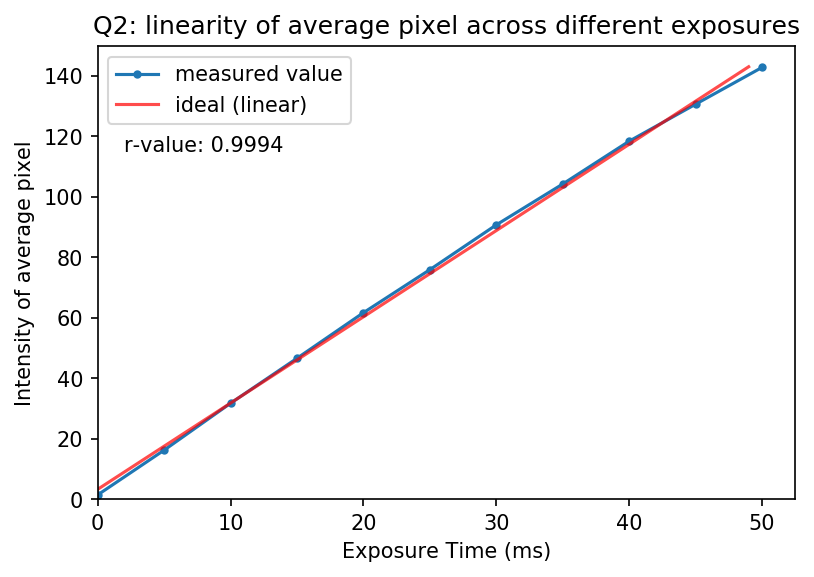

In [5]:
# Q2
middle_average = np.mean(np.mean(np.mean(data, axis=1, dtype=np.int32),axis=1),axis=1)
plt.plot(range(0,55,5), middle_average, marker=".", label="measured value")
plt.xlim(left=0)
plt.ylim(bottom=0)
slope, intercept, r_value, p_value, std_err = stats.linregress(range(0,55,5),middle_average)
xline = range(0,50,1)
plt.plot(xline, list(map((lambda x: x*slope+intercept),xline)),
         label="ideal (linear)",color="red",alpha=0.7)
plt.text(2,115,"r-value: {:.4f}".format(r_value))
plt.title("Q2: linearity of average pixel across different exposures")
plt.xlabel("Exposure Time (ms)")
plt.ylabel("Intensity of average pixel")
plt.legend()
plt.show()

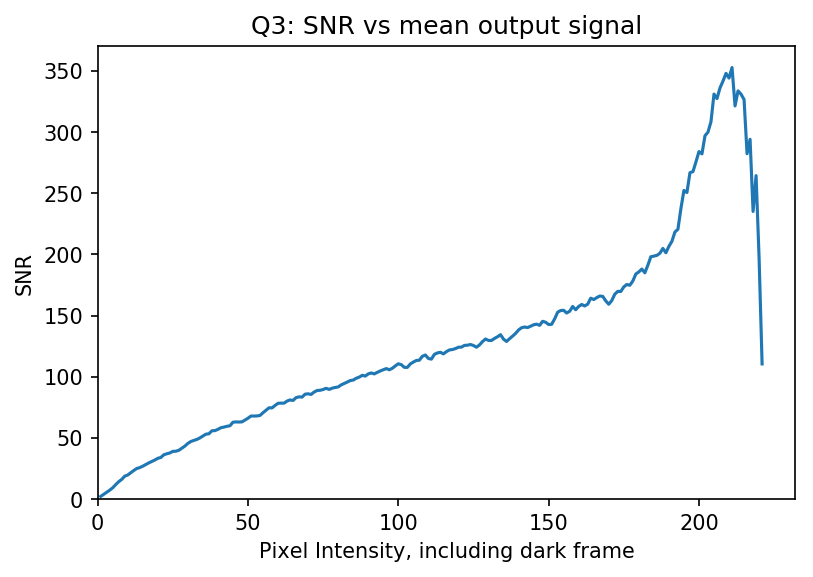

In [6]:
# Q3
x = np.array(range(256)[1:], dtype=np.float64)
plt.plot(x,x/q1_data[1:])
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.title("Q3: SNR vs mean output signal")
plt.xlabel("Pixel Intensity, including dark frame")
plt.ylabel("SNR")
plt.show()

In [7]:
# Q4
stdframes = np.std(data, axis=1, dtype=np.float32)
maxframes= np.amax(data.astype(np.float32), axis=1)
fpnframes = stdframes/maxframes
fpnframes = np.repeat(fpnframes,100, axis=1)
print(fpnframes.shape)

del stdframes,maxframes
FPN = np.column_stack((data.flatten(),fpnframes.flatten()))
del fpnframes

def summarize(invals):
    noise_result = np.full(256,0, dtype=np.float64)
    noise_pts = np.full(256,0, dtype=np.float64)
    for point in invals:
        noise_result[int(point[0])] += point[1]
        noise_pts[int(point[0])] += 1
    return noise_result/noise_pts

q4_data = summarize(FPN[::10])
del FPN
print(q4_data.shape)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:138: RuntimeWarning: invalid value encountered in sqrt
  ret = um.sqrt(ret, out=ret)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


(11, 48000, 640)
(256,)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


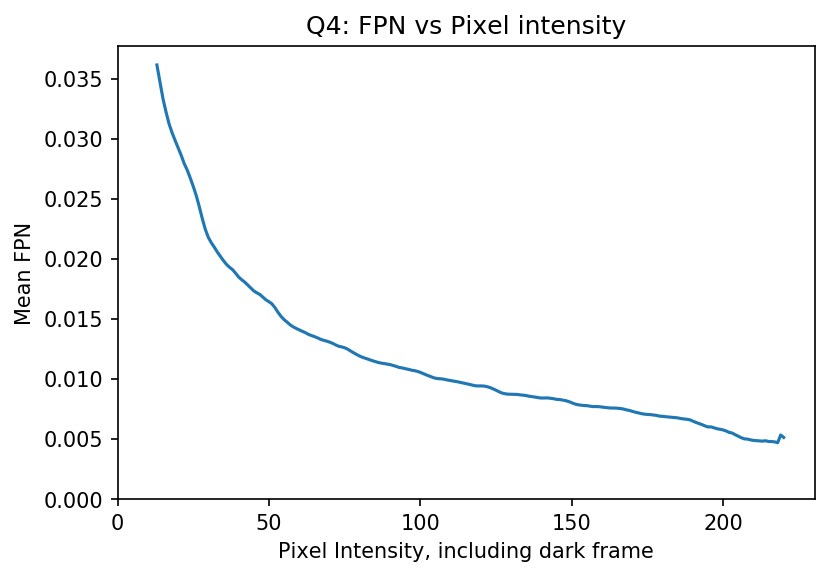

In [8]:
# Q4
plt.plot(range(256)[1:],q4_data[1:])
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.title("Q4: FPN vs Pixel intensity")
plt.xlabel("Pixel Intensity, including dark frame")
plt.ylabel("Mean FPN")
plt.show()

In [9]:
#Q5
range_data = np.mean(data[-1].astype(np.float64))/np.mean(data[0].astype(np.float64))
drange = 20*np.log10(range_data)
print("Dynamic range: {:.3f}dB".format(drange))


Dynamic range: 38.180dB
